In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "../datasets/tradhist.csv"
df = pd.read_csv(PATH)

/var/folders/qc/xp9q1kcj79315fgc2jdgwtv00000gn/T/ipykernel_38672/562444793.py:2: DtypeWarning: Columns (8,12,14,21,24,28,33,45,46,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH)


In [3]:
df

,Unnamed: 0,iso_o,iso_d,year,FLOW,FLOW_0,SOURCE_TF,GDP_o,SOURCE_GDP_o,GDP_d,...,CONTI_o,CONTI_d,REGIO_o,REGIO_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
0,0,NaN,ADEN,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,ADEN,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,ADEN,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,ADEN,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,ADEN,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,2502422,ZWE,ZMB,2010,46558256.0,NaN,DOTS_IP,6.097825e+09,WDI,1.311544e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502423,2502423,ZWE,ZMB,2011,55171376.0,NaN,DOTS_IP,6.838230e+09,WDI,1.464204e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502424,2502424,ZWE,ZMB,2012,58787336.0,NaN,DOTS_IP,7.845171e+09,WDI,1.614464e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502425,2502425,ZWE,ZMB,2013,77869780.0,NaN,DOTS_IP,8.629172e+09,WDI,1.793963e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0


In [4]:
df.nunique()

Unnamed: 0    2502427
iso_o             325
iso_d             325
year              188
FLOW           787987
               ...   
OECD_d              2
EU_o                2
EU_d                2
GATT_o              2
GATT_d              2
Length: 64, dtype: int64

In [5]:
df[df["FLOW"] > 10000]["FLOW"]

1501         492920.70
1502          38164.50
1503          30052.34
1504          44906.54
1505          33957.27
              ...     
2502422    46558256.00
2502423    55171376.00
2502424    58787336.00
2502425    77869780.00
2502426    62405360.00
Name: FLOW, Length: 963682, dtype: float64

In [6]:
features = ["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig", "OECD_o", "OECD_d",
            "GATT_o", "GATT_d", "XPTOT_o", "year", "FLOW"]

df = df[features]

In [7]:
cleaned_df = df.loc[(df["year"] > 2008) & (df["FLOW"] > 5000)].dropna()

In [8]:
cleaned_df.shape

(119340, 14)

(array([10420., 14946., 17672., 20725., 21039., 17016., 10970.,  5127.,
         1295.,   130.]),
 array([ 8.51727519, 10.30265203, 12.08802887, 13.87340571, 15.65878255,
        17.44415939, 19.22953623, 21.01491307, 22.80028991, 24.58566675,
        26.37104358]),
 <BarContainer object of 10 artists>)

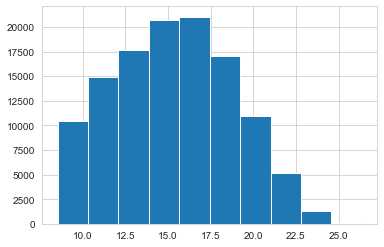

In [9]:
plt.hist(np.log(cleaned_df["FLOW"]))

(array([  113.,   578.,  5979.,  8962., 22585., 25555., 23483., 17924.,
        11164.,  2997.]),
 array([16.67179086, 18.00435223, 19.33691359, 20.66947496, 22.00203632,
        23.33459769, 24.66715906, 25.99972042, 27.33228179, 28.66484315,
        29.99740452]),
 <BarContainer object of 10 artists>)

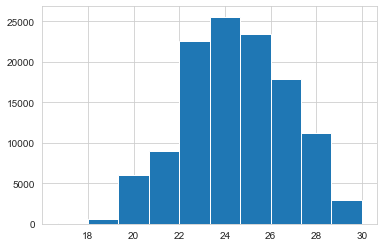

In [10]:
plt.hist(np.log(cleaned_df["GDP_d"]))

In [11]:
transformed_df = np.log(cleaned_df[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "XPTOT_o", "FLOW"]])

In [12]:
remaining_df = cleaned_df[["Comlang", "Contig", "OECD_o", "OECD_d",
                           "GATT_o", "GATT_d", "year"]]

In [13]:
final_df = pd.merge(transformed_df, remaining_df, left_index=True, right_index=True)

In [14]:
final_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,XPTOT_o,FLOW,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,year
1707,21.201405,23.138376,4.624345,10.268449,9.485562,21.706029,11.005971,0.0,0.0,0.0,0.0,0.0,0.0,2011
1839,21.195837,25.815523,4.619231,8.949680,9.455095,21.033409,9.323274,0.0,0.0,0.0,0.0,0.0,1.0,2009
1841,21.201405,26.105600,4.624345,9.075061,9.455095,21.706029,11.640235,0.0,0.0,0.0,0.0,0.0,1.0,2011
1874,21.195837,26.211230,4.619231,10.616404,8.554063,21.033409,13.704223,0.0,0.0,0.0,0.0,0.0,1.0,2009
1876,21.201405,26.576049,4.624345,10.637192,8.554063,21.706029,16.525571,0.0,0.0,0.0,0.0,0.0,1.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,22.531198,23.297056,9.544946,9.540898,6.369551,21.451044,17.656215,1.0,1.0,0.0,0.0,1.0,1.0,2010
2502423,22.645795,23.407163,9.564905,9.571054,6.369551,21.508108,17.825955,1.0,1.0,0.0,0.0,1.0,1.0,2011
2502424,22.783164,23.504854,9.586410,9.601475,6.369551,21.622516,17.889437,1.0,1.0,0.0,0.0,1.0,1.0,2012
2502425,22.878414,23.610278,9.608988,9.632078,6.369551,21.531294,18.170549,1.0,1.0,0.0,0.0,1.0,1.0,2013


In [15]:
from sklearn.model_selection import train_test_split

final_df = final_df.drop(["year"], axis=1)

In [16]:
final_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,XPTOT_o,FLOW,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d
1707,21.201405,23.138376,4.624345,10.268449,9.485562,21.706029,11.005971,0.0,0.0,0.0,0.0,0.0,0.0
1839,21.195837,25.815523,4.619231,8.949680,9.455095,21.033409,9.323274,0.0,0.0,0.0,0.0,0.0,1.0
1841,21.201405,26.105600,4.624345,9.075061,9.455095,21.706029,11.640235,0.0,0.0,0.0,0.0,0.0,1.0
1874,21.195837,26.211230,4.619231,10.616404,8.554063,21.033409,13.704223,0.0,0.0,0.0,0.0,0.0,1.0
1876,21.201405,26.576049,4.624345,10.637192,8.554063,21.706029,16.525571,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,22.531198,23.297056,9.544946,9.540898,6.369551,21.451044,17.656215,1.0,1.0,0.0,0.0,1.0,1.0
2502423,22.645795,23.407163,9.564905,9.571054,6.369551,21.508108,17.825955,1.0,1.0,0.0,0.0,1.0,1.0
2502424,22.783164,23.504854,9.586410,9.601475,6.369551,21.622516,17.889437,1.0,1.0,0.0,0.0,1.0,1.0
2502425,22.878414,23.610278,9.608988,9.632078,6.369551,21.531294,18.170549,1.0,1.0,0.0,0.0,1.0,1.0


In [17]:
final_df.columns

Index(['GDP_o', 'GDP_d', 'POP_o', 'POP_d', 'Distw', 'XPTOT_o', 'FLOW',
       'Comlang', 'Contig', 'OECD_o', 'OECD_d', 'GATT_o', 'GATT_d'],
      dtype='object')

In [18]:
X = final_df[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig", "OECD_o", "OECD_d","GATT_o", "GATT_d", "XPTOT_o"]]

y = final_df[["FLOW"]]

In [19]:
X_val = X.values
y_val = y.values

In [20]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X_val)
TargetVarScalerFit=TargetVarScaler.fit(y_val)

# Generating the standardized values of X and y
X_val=PredictorScalerFit.transform(X_val)
y_val=TargetVarScalerFit.transform(y_val)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.25, random_state=42)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(89505, 12)
(89505, 1)
(29835, 12)
(29835, 1)


In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=12, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, validation_split=0.25, batch_size = 20, epochs = 20, verbose=1)

Epoch 1/20
  22/3357 [..............................] - ETA: 17s - loss: 1.0446

2022-11-20 10:25:37.587053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3353/3357 [============================>.] - ETA: 0s - loss: 0.3473

2022-11-20 10:25:53.683151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3357/3357 [==============================] - 19s 6ms/step - loss: 0.3475 - val_loss: 0.3103
Epoch 2/20
3357/3357 [==============================] - 18s 5ms/step - loss: 0.3094 - val_loss: 0.3072
Epoch 3/20
3357/3357 [==============================] - 18s 5ms/step - loss: 0.3060 - val_loss: 0.3036
Epoch 4/20
3357/3357 [==============================] - 18s 5ms/step - loss: 0.3039 - val_loss: 0.3024
Epoch 5/20
3357/3357 [==============================] - 18s 5ms/step - loss: 0.3033 - val_loss: 0.3050
Epoch 6/20
3357/3357 [==============================] - 18s 5ms/step - loss: 0.3030 - val_loss: 0.3040
Epoch 7/20
3357/3357 [==============================] - 18s 5ms/step - loss: 0.3030 - val_loss: 0.3014
Epoch 8/20
3357/3357 [==============================] - 17s 5ms/step - loss: 0.3025 - val_loss: 0.3036
Epoch 9/20
3357/3357 [==============================] - 19s 6ms/step - loss: 0.3023 - val_loss: 0.3019
Epoch 10/20
3357/3357 [==============================] - 18s 5ms/step - loss: 0.3022

In [27]:
y_pred = model.predict(X_test)

 84/933 [=>............................] - ETA: 1s

2022-11-20 10:32:47.293447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


933/933 [==============================] - 2s 2ms/step


In [28]:
from tensorflow_addons.metrics.r_square import RSquare
metric = RSquare()
metric.update_state(y_test, y_pred)
result = metric.result()
result.numpy()

0.6996286

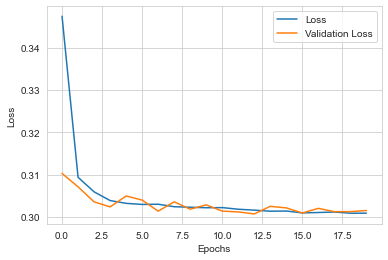

In [29]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")

In [31]:
model.save("//Users/prateekrao/Desktop/model.h5")